In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [90]:
df = pd.read_csv('./testfile.txt', names=['x', 'y'])
#df.columns = ['x', 'y']
df.head(5)

,x,y
0,-5.000000,51.764052
1,-4.795918,45.423064
2,-4.591837,41.274448
3,-3.979592,26.636216
4,-3.571429,20.256806


In [91]:
def init_design_matrix(x, n):
    row_size = len(x)
    col_size = n
    design_matrix = np.zeros((row_size, col_size))
    for col in range(n):
        for row in range(row_size):
            design_matrix[row][n-1-col] = x[row] ** col
    return design_matrix

In [92]:
x = df['x'].values.tolist()
b = df['y'].values.tolist()
b = np.array(b).reshape(-1,1)
n = 2
Lambda = 0

print(x)
print(b)

[-5.0, -4.795918367346938, -4.591836734693878, -3.9795918367346936, -3.571428571428571, -2.959183673469388, -2.7551020408163263, -1.7346938775510203, -1.326530612244898, -0.9183673469387754, -0.7142857142857144, -0.3061224489795915, 0.1020408163265305, 0.7142857142857144, 1.122448979591837, 1.7346938775510203, 1.9387755102040811, 2.5510204081632653, 2.9591836734693877, 3.979591836734695, 4.387755102040817, 4.591836734693878, 5.0]
[[51.76405235]
 [45.42306433]
 [41.2744481 ]
 [26.6362165 ]
 [20.25680606]
 [11.61842924]
 [10.45052507]
 [ 1.84809823]
 [-1.04053496]
 [-4.6146308 ]
 [-1.38719773]
 [-1.9916444 ]
 [-0.91292461]
 [ 6.63482003]
 [ 9.54686746]
 [15.72016147]
 [20.62251684]
 [33.48059726]
 [40.76391966]
 [66.89976056]
 [78.44316466]
 [86.99156782]
 [99.78725972]]


In [93]:
A = init_design_matrix(x, n)
#print(A)
#print(A.T)
target_matrix = np.matmul(A.T, A) + np.eye(n)*Lambda
print(target_matrix)

[[225.22907122  -3.57142857]
 [ -3.57142857  23.        ]]


In [94]:
#import scipy.linalg as linalg
#LU = linalg.lu_factor(target_matrix)
#b = np.matmul(A.T, b)
#X = linalg.lu_solve(LU, b) 
#print ("Solutions:\n",X) 


In [95]:
def LU_decomposition(m):
    n = len(m)
    L = np.eye(n)
    U = np.eye(n)
    for k in range(n):
        U[k][k] = m[k][k]
        
        for i in range(k+1, n):
            L[i][k] = m[i][k] / U[k][k]
            U[k][i] = m[k][i]
        for i in range(k+1, n):
            for j in range(k+1, n):
                m[i][j] = m[i][j] - L[i][k]*U[k][j]
    return L, U


In [96]:
L, U = LU_decomposition(target_matrix)
print(L, U)
print(np.matmul(L, U))
#b = np.matmul(A.T, b)
#X = np.matmul(test, b)
#print ("Solutions:\n",X) 



(array([[ 1.        ,  0.        ],
       [-0.01585687,  1.        ]]), array([[225.22907122,  -3.57142857],
       [  0.        ,  22.94336831]]))
[[225.22907122  -3.57142857]
 [ -3.57142857  23.        ]]


In [97]:
def tranpose_matrix(m):
    row = len(m);
    col = len(m[0]);
    t = [];
    for i in range(col):
        t.append([m[j][i] for j in range(row)])
        
    return t;

In [98]:
def inverse_matrix(L, U, rows_size):
    b = np.eye(rows_size)
    inverse_m = []
    for y in b:
        x = [0 for _ in range(len(y))]
        Ux = []
        for i in range(len(y)):
            tmp = y[i]
            for j in range(i):
                tmp = tmp - Ux[j]*L[i][j]
            Ux.append(tmp)
        for i in reversed(range(len(Ux))):
            tmp = Ux[i]
            for j in range(len(Ux) - i - 1):
                j = j + i + 1
                tmp = tmp - x[j]*U[i][j] 
            x[i] = tmp / U[i][i]
        inverse_m.append(x)
    inverse_m = np.array(inverse_m)
    inverse_m = inverse_m.T
    #inverse_m = tranpose_matrix(inverse_m)
    return inverse_m;

In [99]:
inverse_mat = inverse_matrix(L, U, 2)
inverse_mat = np.array(inverse_mat)
print(inverse_mat)

[[0.00445088 0.00069113]
 [0.00069113 0.04358558]]


('Solutions:\n', array([[ 4.43295031],
       [29.30640471]]))


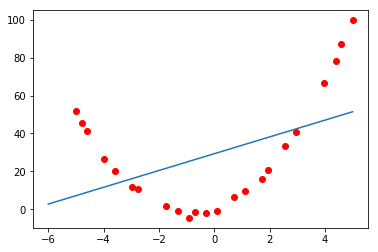

In [100]:
b = np.matmul(A.T, b)
X = np.matmul(inverse_mat, b)
print ("Solutions:\n",X) 

c = np.array(range(-6,6))
d = c**1 *X[0] + c**0 * X[1]
x = df['x'].values.tolist()
b = df['y'].values.tolist()
plt.plot(x,b, 'ro')
plt.plot(c,d)
plt.show()

In [24]:
x = df['x'].values.tolist()
b = df['y'].values.tolist()
b = np.array(b).reshape((-1,1))
n = 2
Lambda = 0
A = init_design_matrix(x, n)
#print(A)
#print(A.T)

In [25]:
def newton(A, b, N):
    x_old = np.zeros((N,1))
    for _ in range(1):
        AT = A.T
        hession = np.matmul(2*AT, A)
        L, U = LU_decomposition(hession)
        derivate = np.matmul(hession, x_old) - np.matmul(2*AT, b)

        inverse_hession = inverse_matrix(L, U, 2)

        x_gradient = np.matmul(inverse_hession, derivate)
        x_new = x_old - x_gradient

        
        x_old = x_new
    
    return x_new

In [26]:
X_newton = newton(A, b, n)
print(X_newton)

[[ 4.43295031]
 [29.30640471]]
